In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Muhammad Haziq Rao

Afaq Asif

In [ ]:
import numpy as np
import cv2
import os
import pickle
import glob
from sklearn.utils import shuffle 
from sklearn import svm,metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
dsize = (224,224)

In [ ]:
img_dir = "/content/drive/MyDrive/brain_tumor/no"
data_path = os.path.join(img_dir,'*') 
no_images = glob.glob(data_path) 
data_no = [] 
for i in no_images: 
    img = cv2.imread(i)
    img = cv2.resize(img,dsize) 
    img = img / 255.
    data_no.append(img)

In [ ]:
len(data_no)

98

In [ ]:
data_no[0].shape

(224, 224, 3)

In [ ]:
img_dir = "/content/drive/MyDrive/brain_tumor/yes/"
data_path = os.path.join(img_dir,'*') 
no_images = glob.glob(data_path) 
data_yes = []
k=0 
for i in no_images: 
    img = cv2.imread(i)
    img = cv2.resize(img,dsize) 
    img = img / 255.
    data_yes.append(img)

In [ ]:
len(data_yes)

155

In [ ]:
data_yes[0].shape

(224, 224, 3)

In [ ]:
X = []
y = []
for i in data_yes:
  X.append(i)
  y.append(1)


In [ ]:
for i in data_no:
  X.append(i)
  y.append(0)


In [ ]:
len(X)

253

In [ ]:
X = np.array(X)
y = np.array(y)
y.shape

(253,)

In [ ]:
X,y = shuffle(X,y)
y.shape

(253,)

In [ ]:
X_train,X_test ,y_train, y_test =  train_test_split(X, y, test_size=0.2)
y_train.shape

(202,)

In [ ]:
X_test.shape

(51, 224, 224, 3)

In [ ]:
X_train.shape

(202, 224, 224, 3)

In [ ]:
X_train.shape
y_train.shape

(202,)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 150528)
y_train = y_train.reshape(y_train.shape[0], )

In [ ]:
# Create a classifier: a support vector classifier
param_grid = [
  {'C': [1, 10,20,30,40], 'kernel': ['linear']},
 ]
svc = svm.SVC()
classifier = GridSearchCV(svc, param_grid, verbose = 3)
classifier.fit(X_train, y_train)
#fit to the training data

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. C=1, kernel=linear, score=0.829, total=   7.3s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV] .................. C=1, kernel=linear, score=0.732, total=   7.1s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.4s remaining:    0.0s


[CV] .................. C=1, kernel=linear, score=0.775, total=   7.3s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.750, total=   7.3s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.750, total=   7.0s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.829, total=   7.2s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.732, total=   7.1s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.775, total=   7.2s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.750, total=   7.3s
[CV] C=10, kernel=linear .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  3.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 20, 30, 40], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 150528)
y_test = y_test.reshape(y_test.shape[0], )

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 20, 30, 40], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3):
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.79      0.81      0.80        27

    accuracy                           0.78        51
   macro avg       0.78      0.78      0.78        51
weighted avg       0

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

i = 1
neighbours = []
while i<176:    #n samples-1
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  neighbours.append(score) 
  i = i+1

In [ ]:
max_value = max(neighbours) #max score value when neighbours = 97
max_index = neighbours.index(max_value)

In [ ]:
knn_simple = KNeighborsClassifier(n_neighbors = max_index + 1) # as we take "i" as 1 in first iteration
knn_simple.fit(X_train, y_train)
knn_simple.score(X_test, y_test)


0.803921568627451

In [ ]:
 hog = cv2.HOGDescriptor()
 im = cv2.imread('/content/drive/MyDrive/brain_tumor/no/1 no.jpeg')
 print(im.shape)
 h = hog.compute(im)

(630, 630, 3)


In [ ]:
h.shape

(16907940, 1)

In [ ]:
from skimage.feature import hog
import matplotlib.pyplot as plt

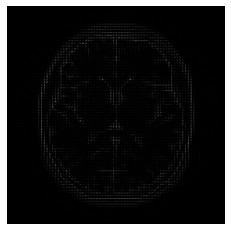

In [ ]:
fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

In [ ]:
fd.shape

(213444,)

In [ ]:
hog_image.shape

(630, 630)

In [ ]:
img_dir = "/content/drive/MyDrive/brain_tumor/no"
data_path = os.path.join(img_dir,'*') 
no_images = glob.glob(data_path) 
data_no_feature = []
data_no_hog_image = [] 
for i in no_images: 
    img = cv2.imread(i)
    img = cv2.resize(img,dsize) 
    img = img / 255.
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
    data_no_feature.append(fd)
    data_no_hog_image.append(hog_image)
    

In [ ]:
img_dir = "/content/drive/MyDrive/brain_tumor/yes"
data_path = os.path.join(img_dir,'*') 
no_images = glob.glob(data_path) 
data_yes_feature = []
data_yes_hog_image = [] 
for i in no_images: 
    img = cv2.imread(i)
    img = cv2.resize(img,dsize) 
    img = img / 255.
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
    data_yes_feature.append(fd)
    data_yes_hog_image.append(hog_image)
    

In [ ]:
X_hog = []
y_hog = []
for i in data_yes_feature:
  X_hog.append(i)
  y_hog.append(1)

In [ ]:
for i in data_no_feature:
  X_hog.append(i)
  y_hog.append(0)

In [ ]:
X_hog = np.array(X_hog)
y_hog = np.array(y_hog)

In [ ]:
X_hog,y_hog = shuffle(X_hog,y_hog)

In [ ]:
X_hog_train,X_hog_test ,y_hog_train, y_hog_test =  train_test_split(X_hog, y_hog, test_size=0.2)
y_hog_train.shape

(202,)

In [ ]:
X_hog_train.shape

(202, 26244)

In [ ]:
# Create a classifier: a support vector classifier
param_grid = [
  {'C': [1, 10,20,30,40,50,60,70,80], 'kernel': ['linear']},
 ]
svc = svm.SVC()
classifier = GridSearchCV(svc, param_grid, verbose = 100)
classifier.fit(X_hog_train, y_hog_train)
#fit to the training data

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.805, total=   1.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.951, total=   1.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.800, total=   1.3s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s remaining:    0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.725, total=   1.3s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 20, 30, 40, 50, 60, 70, 80],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=100)

In [ ]:
y_pred = classifier.predict(X_hog_test)

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_hog_test, y_pred)))

Classification report for classifier GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 20, 30, 40, 50, 60, 70, 80],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=100):
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        22
           1       0.86      0.86      0.86        29

    accuracy                           0.84        51
   macro avg       0.84      0

Text(0.5, 12.5, 'Predicted label')

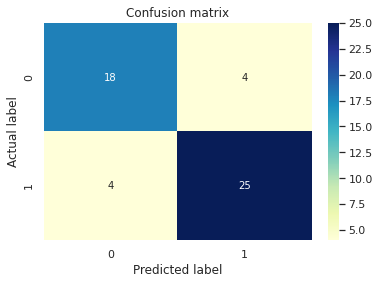

In [ ]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

y_pred = classifier.predict(X_hog_test)
cnf_matrix = metrics.confusion_matrix(y_hog_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_hog_train, y_hog_train)
knn.score(X_hog_test, y_hog_test)

i = 1
neighbours = []
while i<176:    #n samples-1
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_hog_train, y_hog_train)
  score = knn.score(X_hog_test, y_hog_test)
  neighbours.append(score) 
  i = i+1

In [ ]:
max_value = max(neighbours) #max score value when neighbours = 97
max_index = neighbours.index(max_value)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = max_index + 1) # as we take "i" as 1 in first iteration
knn.fit(X_hog_train, y_hog_train)
knn.score(X_hog_test, y_hog_test)

0.8431372549019608

Text(0.5, 12.5, 'Predicted label')

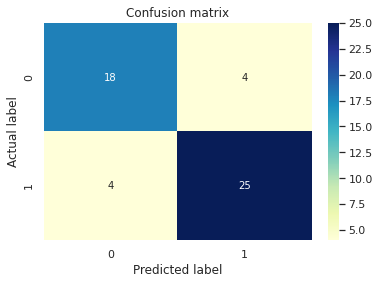

In [ ]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

y_pred = knn.predict(X_hog_test)
cnf_matrix = metrics.confusion_matrix(y_hog_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('KNN_Simple',knn), ('SVM_HOG', classifier)], voting='hard')
 
# training all the model on the train dataset
final_model.fit(X_hog_train, y_hog_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(X_hog_test)
 
# printing log loss between actual and predicted value
print(log_loss(y_hog_test, pred_final))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.805, total=   1.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.951, total=   1.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.800, total=   1.3s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s remaining:    0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.725, total=   1.3s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (final_model, metrics.classification_report(y_hog_test, pred_final)))

Classification report for classifier VotingClassifier(estimators=[('KNN_Simple',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=1,
                                                   p=2, weights='uniform')),
                             ('SVM_HOG',
                              GridSearchCV(cv=None, error_score=nan,
                                           estimator=SVC(C=1.0,
                                                         break_ties=False,
                                                         cache_size=200,
                                                         class_weight=None,
                                                         coef0=0.0,
                     

In [ ]:

# save the model to disk
filename = '/content/drive/MyDrive/brain_tumor/final_model.h5'
pickle.dump(final_model, open(filename, 'wb'))
#final_model.save('/content/drive/MyDrive/brain_tumor/final_model.h5')

In [ ]:
# load the model from disk
filename = '/content/drive/MyDrive/brain_tumor/final_model.h5'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_hog_train, y_hog_train)
print(result)
#my_model = load_model('/content/drive/MyDrive/brain_tumor/final_model.h5')

1.0


In [ ]:
from sklearn import tree

In [ ]:
classifier_decision_tree = tree.DecisionTreeClassifier()
classifier_decision_tree.fit(X_hog_train,y_hog_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 201.90857142857143, 'X[23106] <= 0.04\ngini = 0.469\nsamples = 202\nvalue = [76, 126]'),
 Text(83.7, 170.84571428571428, 'X[12085] <= 0.166\ngini = 0.328\nsamples = 63\nvalue = [50, 13]'),
 Text(41.85, 139.78285714285715, 'X[16099] <= 0.019\ngini = 0.145\nsamples = 51\nvalue = [47, 4]'),
 Text(20.925, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(62.775000000000006, 108.72, 'gini = 0.0\nsamples = 47\nvalue = [47, 0]'),
 Text(125.55000000000001, 139.78285714285715, 'X[15107] <= 0.086\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(104.625, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(146.475, 108.72, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(251.10000000000002, 170.84571428571428, 'X[18117] <= 0.293\ngini = 0.304\nsamples = 139\nvalue = [26, 113]'),
 Text(209.25, 139.78285714285715, 'X[5713] <= 0.045\ngini = 0.189\nsamples = 123\nvalue = [13, 110]'),
 Text(188.32500000000002, 108.72, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(230

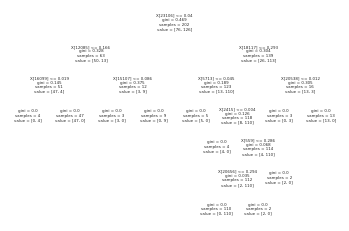

In [ ]:
tree.plot_tree(classifier_decision_tree)

In [ ]:
classifier_decision_tree.score(X_hog_test, y_hog_test)

0.7843137254901961

Text(0.5, 12.5, 'Predicted label')

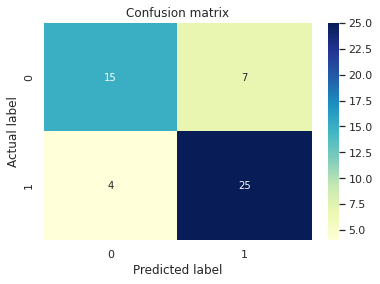

In [ ]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

y_pred = classifier_decision_tree.predict(X_hog_test)
cnf_matrix = metrics.confusion_matrix(y_hog_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd.fit(X_hog_train, y_hog_train)
sgd.score(X_hog_test,y_hog_test)

0.8431372549019608

Text(0.5, 12.5, 'Predicted label')

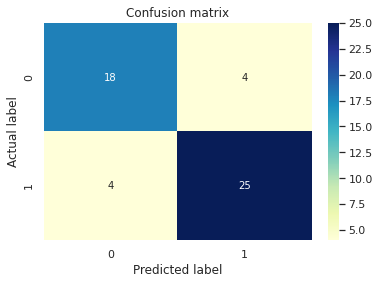

In [ ]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

y_pred = sgd.predict(X_hog_test)
cnf_matrix = metrics.confusion_matrix(y_hog_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Added 3 clssifier


In [ ]:
# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('KNN_Simple',knn), ('SVM_HOG', classifier),('SGD_HOG',sgd)], voting='hard')
 
# training all the model on the train dataset
final_model.fit(X_hog_train, y_hog_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(X_hog_test)
 
# printing log loss between actual and predicted value
print(log_loss(y_hog_test, pred_final))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.805, total=   1.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.951, total=   1.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.800, total=   1.3s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s remaining:    0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.725, total=   1.4s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (final_model, metrics.classification_report(y_hog_test, pred_final)))

Classification report for classifier VotingClassifier(estimators=[('KNN_Simple',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=1,
                                                   p=2, weights='uniform')),
                             ('SVM_HOG',
                              GridSearchCV(cv=None, error_score=nan,
                                           estimator=SVC(C=1.0,
                                                         break_ties=False,
                                                         cache_size=200,
                                                         class_weight=None,
                                                         coef0=0.0,
                     

Text(0.5, 12.5, 'Predicted label')

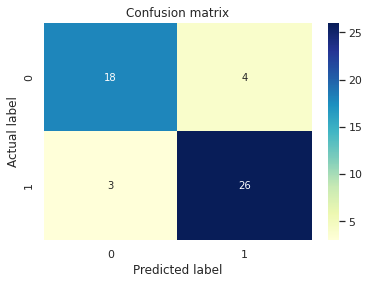

In [ ]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

y_pred = final_model.predict(X_hog_test)
cnf_matrix = metrics.confusion_matrix(y_hog_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Create a classifier: a support vector classifier
param_grid = [
  {'C': [1, 10,20,30,40,50,60,70,80], 'kernel': ['linear']},
 ]
svc = svm.SVC()
classifier = GridSearchCV(svc, param_grid, verbose = 100)
classifier.fit(X_hog_train, y_hog_train)
#fit to the training data

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.805, total=   1.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.951, total=   1.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.800, total=   1.3s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s remaining:    0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.725, total=   1.3s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 20, 30, 40, 50, 60, 70, 80],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=100)

In [ ]:
y_pred = classifier.predict(X_hog_test)
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_hog_test, y_pred)))

Classification report for classifier GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 20, 30, 40, 50, 60, 70, 80],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=100):
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        22
           1       0.86      0.86      0.86        29

    accuracy                           0.84        51
   macro avg       0.84      0

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_hog_train, y_hog_train)
knn.score(X_hog_test, y_hog_test)

i = 1
neighbours = []
while i<176:    #n samples-1
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_hog_train, y_hog_train)
  score = knn.score(X_hog_test, y_hog_test)
  neighbours.append(score) 
  i = i+1

In [ ]:
max_value = max(neighbours) #max score value when neighbours = 97
max_index = neighbours.index(max_value)

knn = KNeighborsClassifier(n_neighbors = max_index + 1) # as we take "i" as 1 in first iteration
knn.fit(X_hog_train, y_hog_train)
knn.score(X_hog_test, y_hog_test)

0.8431372549019608